Small Image Classification Using Convolutional Neural Network (CNN)
Load Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [2]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

DEFINE IMAGE CLASSES

In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [4]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

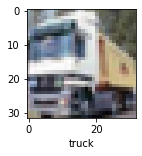

In [5]:
plot_sample(X_train, y_train, 1)

Normalizing the training data

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification

In [7]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.8125 - accuracy: 0.3543
Epoch 2/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.6255 - accuracy: 0.4242
Epoch 3/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.5432 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.4842 - accuracy: 0.4798
Epoch 5/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.4343 - accuracy: 0.4940


You can see that at the end of 5 epochs, accuracy is at around 49%

In [8]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.64      0.56      1000
           1       0.40      0.84      0.54      1000
           2       0.43      0.26      0.33      1000
           3       0.31      0.42      0.36      1000
           4       0.50      0.31      0.38      1000
           5       0.31      0.46      0.37      1000
           6       0.59      0.42      0.49      1000
           7       0.65      0.44      0.52      1000
           8       0.69      0.45      0.55      1000
           9       0.68      0.33      0.44      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



Now let us build a convolutional neural network to train our images

In [9]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4426 - accuracy: 0.4848
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1034 - accuracy: 0.6158
Epoch 3/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.9783 - accuracy: 0.6594
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9016 - accuracy: 0.6858
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8399 - accuracy: 0.7091
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7847 - accuracy: 0.7281
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7368 - accuracy: 0.7443
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6975 - accuracy: 0.7565
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6568 - accuracy: 0.7712
Epoch 10/10
1563/1563 [==============================] - 63s 40m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [10]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9250 - accuracy: 0.6985


[0.9250257015228271, 0.6984999775886536]

In [11]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[6.39421807e-04, 1.15195144e-04, 1.14235980e-03, 9.42686915e-01,
        2.91518896e-04, 4.10066955e-02, 2.33962061e-03, 2.98043979e-05,
        8.21571238e-03, 3.53276730e-03],
       [4.67205327e-03, 3.27642895e-02, 7.12062320e-06, 3.30610703e-07,
        3.90519297e-08, 1.21409671e-09, 2.51272603e-08, 1.16975997e-07,
        9.62179482e-01, 3.76614538e-04],
       [4.70564812e-02, 3.98247689e-01, 1.41603558e-03, 1.17610022e-02,
        1.45779597e-03, 2.62588292e-04, 3.89084395e-04, 3.78998811e-03,
        5.24436116e-01, 1.11831957e-02],
       [8.03314686e-01, 5.49220946e-03, 5.68046980e-03, 6.78816577e-04,
        6.51780749e-04, 3.15499619e-06, 9.60877951e-05, 3.24474968e-05,
        1.83944136e-01, 1.06175154e-04],
       [3.97275301e-07, 1.78527344e-07, 1.20076071e-03, 8.09897319e-04,
        2.21353248e-01, 3.23677872e-04, 7.76308954e-01, 1.48736333e-07,
        2.80162453e-06, 6.46801857e-09]], dtype=float32)

In [12]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [13]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

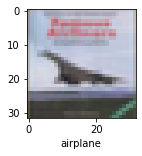

In [14]:
plot_sample(X_test, y_test,3)

In [15]:
classes[y_classes[3]]

'airplane'